## **Instructions**



## **Dataset Explanation and problem being addressed**

### This dataset is from kaggle and it has two folders inside namely Training and Testing which includes different pictures of crows, bears, elephants, and rats separated in each specific folder. This dataset I got from kaggle has its own partition when it comes to train and test data. That is why I did not do the splitting for this dataset.


### The problem being addressed here is a prediction of multiple classification. It is used to predict the animal shown in the picture or in the sample, which can be a help in developing computer vision projects and tasks. This dataset is being processed and used in convolution nueral network model in this activity.

Dataset Link: https://www.kaggle.com/datasets/ikjotsingh221/animal-dataset

In [ ]:
# For storing dataset in drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###

In [ ]:
# Loading the dataset

dataset_path = '/content/drive/MyDrive/Final_Project_Team_7/animal_dataset'

In [ ]:
# Preprocessing (Reshaping images, turning classmode to categorical)

import os
import cv2

# Function to reshape images
def reshape_images(directory, target_shape=(224, 224)):
    for animal_folder in os.listdir(directory):
        # Check if the item is a directory
        if os.path.isdir(os.path.join(directory, animal_folder)):
            for root, dirs, files in os.walk(os.path.join(directory, animal_folder)):
                for file in files:
                    # Check if the file is an image
                    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
                        image_path = os.path.join(root, file)
                        # Read the image
                        image = cv2.imread(image_path)
                        # Resize the image
                        resized_image = cv2.resize(image, (target_shape[1], target_shape[0]))
                        # Check if the image has 3 channels (RGB)
                        if resized_image.shape[2] == 3:
                            # Overwrite the original image with the resized image
                            cv2.imwrite(image_path, resized_image)
                        else:
                            print(f"Skipping {image_path} as it does not have 3 channels (RGB)")

# Directory containing the images
dataset_path = "/content/drive/MyDrive/Final_Project_Team_7/animal_dataset"

# Reshape images in the Training folder
reshape_images(os.path.join(dataset_path, "Training"))

# Reshape images in the Testing folder
reshape_images(os.path.join(dataset_path, "Testing"))


In [ ]:
from PIL import Image
import os

image_dir = '/content/drive/MyDrive/Final_Project_Team_7/animal_dataset/Testing/bears/k4 (100).jpeg'

# Loading the image to check its dimensions and channel
image = Image.open(image_dir)
image.show()
print("Image dimensions:", image.size)
print("Image mode:", image.mode)


Image dimensions: (224, 224)
Image mode: RGB


Found 1244 images belonging to 4 classes.
Found 326 images belonging to 4 classes.
Epoch 1/10
39/39 [==============================] - 20s 300ms/step - loss: 2.7906 - accuracy: 0.2974 - val_loss: 2.2896 - val_accuracy: 0.2914
Epoch 2/10
39/39 [==============================] - 7s 191ms/step - loss: 2.1043 - accuracy: 0.3119 - val_loss: 1.9302 - val_accuracy: 0.3067
Epoch 3/10
39/39 [==============================] - 9s 217ms/step - loss: 1.8505 - accuracy: 0.3706 - val_loss: 1.6505 - val_accuracy: 0.5368
Epoch 4/10
39/39 [==============================] - 8s 197ms/step - loss: 1.6540 - accuracy: 0.5056 - val_loss: 1.4363 - val_accuracy: 0.5368
Epoch 5/10
39/39 [==============================] - 8s 197ms/step - loss: 1.4044 - accuracy: 0.6190 - val_loss: 1.0783 - val_accuracy: 0.8129
Epoch 6/10
39/39 [==============================] - 9s 223ms/step - loss: 1.2481 - accuracy: 0.7629 - val_loss: 0.9514 - val_accuracy: 0.9540
Epoch 7/10
39/39 [==============================] - 8s 217ms/ste

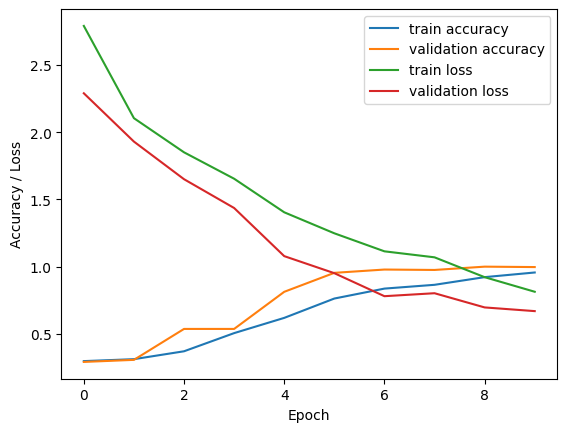

Total time taken: 106.18672132492065 seconds


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers
import matplotlib.pyplot as plt
import time

img_h = 224
img_w = 224
batch_size = 32

# Function to load dataset
def load_dataset(train_dir, test_dir):
    train_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_h, img_w),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_h, img_w),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, test_generator

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_h, img_w, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Function to prepare pixel data
def prep_pixels(trainX, testX):
    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0
    return trainX, testX

# Function to evaluate model
def evaluate_model(model, train_generator, test_generator):
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
    history = model.fit(train_generator, epochs=10, validation_data=test_generator, callbacks=[early_stopping])
    _, test_acc = model.evaluate(test_generator)
    print('Test accuracy:', test_acc)
    return history

# Function to summarize diagnostics
def summarize_diagnostics(history):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy / Loss')
    plt.legend()
    plt.show()

# Function to summarize performance
def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores), np.std(scores), len(scores)))

# Entry point, run the test harness
def run_test_harness(train_dir, test_dir):
    start_time = time.time()
    # Load dataset
    train_generator, test_generator = load_dataset(train_dir, test_dir)
    # Evaluate model
    history = evaluate_model(model, train_generator, test_generator)
    # Summarize diagnostics
    summarize_diagnostics(history)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time taken:", total_time, "seconds")

train_dir = '/content/drive/MyDrive/Final_Project_Team_7/animal_dataset/Training'
test_dir = '/content/drive/MyDrive/Final_Project_Team_7/animal_dataset/Testing'

# Run the test harness
run_test_harness(train_dir, test_dir)


In [ ]:
# save model and architecture to single file
model.save("animals_classifier.hdf5")
print("Saved model to disk")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved model to disk
